# KNN Project

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/zamanali23/KNN-Project/main/ortho_knnnb.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.shape

(310, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [9]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [7]:
data.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [10]:
#In my point viwe dataset is good.
#There is no null values we are good to preceed
#Lets chech in visulaization

In [ ]:
plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber <=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber = 1
plt.show()       

In [34]:
data['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

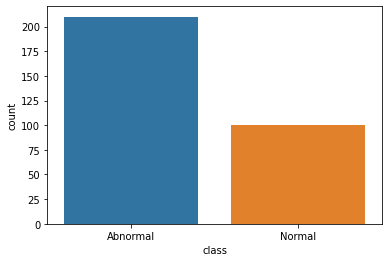

In [35]:
#Lets check the frquency in graph.
sns.countplot(x='class',data=data)
plt.show()

In [36]:
#Select Best the feature

In [38]:
from sklearn.feature_selection import SelectKBest , f_classif

In [41]:
x=data.drop(columns=['class'])
y=data['class']

In [47]:
best_feature=SelectKBest(score_func=f_classif,k=6)
fit=best_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)
best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','score']
best_feature

,Feature,score
0,pelvic_incidence,43.938148
1,pelvic_tilt numeric,36.641311
2,lumbar_lordosis_angle,33.329612
3,sacral_slope,14.294805
4,pelvic_radius,32.712134
5,degree_spondylolisthesis,75.494050


In [48]:
#lets Start Model Building
# Import Model building techniques

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [52]:
scaler=StandardScaler()

In [54]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, -0.31356364,  0.58289256,
        -0.77348834],
       [-0.88582307, -0.88565951, -0.55861259, -0.47712775,  0.04702109,
        -0.69554822],
       [-1.54892681, -1.24785954, -0.82539423, -1.05855695,  0.45311695,
        -0.70658867]])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=94225)

In [63]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=======================Training Score====================")
        print("Accuracy Score ==>   ",accuracy_score(y_pred,y_train))
    elif train==False:
        pred=cnn.predict(x_test)
        print("==========================Test Score===============")
        print("Accuracy Score ====>   ",accuracy_score(y_test,pred))
        print("Classification Report  ",classification_report(y_test,pred))

In [58]:
knn=KNeighborsClassifier()

In [59]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
 metrics_score(knn,x_train,x_test,y_train,y_test,train=True)

=======================Training Score====================
Accuracy Score ==>    0.896551724137931


In [64]:
 metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

==========================Test Score===============
Accuracy Score ====>    0.8076923076923077
Classification Report                 precision    recall  f1-score   support

    Abnormal       0.87      0.85      0.86        54
      Normal       0.68      0.71      0.69        24

    accuracy                           0.81        78
   macro avg       0.77      0.78      0.78        78
weighted avg       0.81      0.81      0.81        78



In [65]:
#Our model is given very good accuracy . its may be our model is overfited
#Lets check overfitting with crossvalidation

In [66]:
from sklearn.model_selection import KFold,cross_val_score

In [72]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=15).mean()

0.8012698412698412

In [73]:
#it means our model in not overfitted

In [74]:
#Lets check Hyperparameter Tuning

In [75]:
#For checking hyperparameter tuning lets import hyperparameter tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [82]:
best_param={'algorithm':['kd_tree','brute'],
           'leaf_size':[3,5,6,4,1],
           'n_neighbors':[7,8,9]}

In [83]:
grid_cv=GridSearchCV(estimator=knn,param_grid=best_param)

In [84]:
grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 4, 1],
                         'n_neighbors': [7, 8, 9]})

In [85]:
grid_cv.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 8}

In [86]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=3,n_neighbors=8)

In [87]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=8)

In [88]:
 metrics_score(knn,x_train,x_test,y_train,y_test,train=True)

=======================Training Score====================
Accuracy Score ==>    0.8577586206896551


In [89]:
 metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

==========================Test Score===============
Accuracy Score ====>    0.7948717948717948
Classification Report                 precision    recall  f1-score   support

    Abnormal       0.84      0.87      0.85        54
      Normal       0.68      0.62      0.65        24

    accuracy                           0.79        78
   macro avg       0.76      0.75      0.75        78
weighted avg       0.79      0.79      0.79        78



In [ ]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date - 10-09-2022
#Time - 13:36